# Lecture 7: Overfitting and Regularization - 2

COMP 3921F \
Applied Machine Learning \
Mon 4:40 PM - 5:55 PM \
Tue: 5:00 PM - 6:15 PM

Professor: __Ramesh Natarajan__ \
Email: **ramesh.natarajan@yu.edu** \
Department of Computer Science \
Stern College and Yeshiva University

Date: Feb 12, 2024



## Acknowledgements

1. The starting point for developing the notebook-based instruction material was the set of notebooks provided by the previous  course instructor__[Prof. Zach Glassman](https://www.linkedin.com/in/zachary-glassman-7088844b/)__.
2. These notebooks have been augmented by similar instruction material taken from many, many other sources, including official documentation from many ML libraries and frameworks. I have adapted and modified the content where needed to make it compatible with student level, orientation and proficiency in this course.
3. The primary addition sources include:
   1. Course content from V. Kuleshov, Cornell Tech __[repo](https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/blob/main/notebooks/lecture1-introduction.ipynb)__.
   2. Book and support material from Hal Daume II, __[A course in Machine Learning](http://ciml.info)__. __[repo](https://github.com/hal3/ciml/)__
   3. Book and support material from A. Geron, __[Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow (3rd edition)](https://homl.info/er3)__. __[repo](https://github.com/ageron/handson-ml3/blob/main/README.md)__




# Announcements

1. Problem Set 2 is due on Feb 14  
2. Recitations will review Linear Models 2.
3. You should continue  to review and refresh yourself on the mathematical prerequisites for applied machine learning from part 1 for Deisenroth, Faisal and Ong, __[Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)__.



# Overfitting and Regularization 


<table>
    <td width="40%"><center>
        <img src="./img/Lecture-06/overfitting-creative.png" />      
    </center>
    Generated by Chat-GPT 
     </td>  
    <td>

We have seen that the model accuracy on the training data set decreses continuously as the model complexity is increased.  At the same time the corresponding test data set accuracy first decreases and then increases as the model complexity is increased. 


<center>
 <img src="./img/Lecture-06/train-test-error.png" />    
</center>


</td></table> 


# Model Complexity

 Typically when training decision trees for classification, the node splitting during training is continued till all the nodes are "pure", i.e. consist of training examples that belong to a single class. The pruning step then works backwards absorbing leaf nodes with the smallest impurity gain into the parent nodes, In reverse pruning order, this results in a set of models  $\cal{M}_0, \cal{M}_1, \cal{M}_2 \ldots$  of increasing model complexity, which are nested so that $\cal{M}_0 \subset \cal{M}_1 \subset \cal{M}_2 \ldots$ etc. The measure of the model complexity for each model decsion tree in this sequence could be the number of nodes in the decision tree.   

Similarly for linear models, one can imagine a set of nested models $\cal{M}_0, \cal{M}_1, \cal{M}_2 \ldots$ with and increasing number of features, and the model complexity could just be the number of non-zero model coefficients $\theta$ - in vector space terminology, is known as the **cardinality** of the coefficient vector, and is the same as the $l_0$ norm of the coefficient vector $\theta$ and  denoted by $||\theta||_0$. From your __[linear algebra review](https://mml-book.github.io/book/mml-book.pdf)__  you may be aware that all vector norms (including $l_1, l_2$ etc. are equivalent and therefore any of these norms can also be a measure of model complexity. 

 

# Singular Values, Eigenvalues and Collinearity

For simplicity, we now consider linear models with the following pre-transformation of the target and features. The target variable is centered to have mean zero (i.e. by substracting the target mean from the original target vector), and the features are "standardized" to have mean zero and standard deviation 1 (i.e. for each original feature, we subtract the mean and divide by the standard deviation).  

The linear model with this pre-transformed data can then be fitted without the intercept term $\theta_0$, and magnitude of the individual linear coefficients can also be compared since all the features are measured on the same scale.

As before, in the case of the squared error loss function with the $l_2$ norm regularization is known as **Ridge Regression**, and the gradients of this loss function can be computed explicitly.

\begin{align*}
\nabla_\theta \cal{L}(\theta) 
& = \nabla_\theta \frac{1}{2} (X \theta - y)^T  (X \theta - y) + \frac{1}{2} \lambda \theta^T \theta \\
& = (X^T X) \theta - X^T y + \lambda \theta^T \theta
\end{align*}


Setting the gradient of the loss function to zero, we obtain the * regularized normal equations*:
$$ (X^T X + \lambda I) \theta = X^T y.$$

where $I$ is the Hence, the value $\hat{\theta}$ that minimizes this objective is given by:
$$ \hat{\theta} = (X^T X + \lambda I )^{-1} X^T y.$$

Note that the matrix $(X^T X)$ is always invertible for any $\lambda > 0$. 

It is interesting to see the effect of the regularization term on the properties of the matrix $(X^T X + \lambda I )$.   

When there are one or more correlated groups of features in a linear regression model this is known as **feature collinearity**.  The model coefficients can swing wildly since the individual contribuitions from the correlations features will cancel each other out.  Using regularization limits the magnitude of these wild swings and reduces the parameter estimation variance, but these estimates are no longer unbiased. 

singular values of X: 
 [1.53687233e+01 1.51282867e+01 4.44904447e+00 3.63916485e+00
 1.14060078e+00 7.39121587e-01 1.98783524e-01 1.11380920e-01
 2.14134347e-02 1.08462740e-02]
sqrt of eigenvalues of (X^TX): 
 [1.53687233e+01 1.51282867e+01 4.44904447e+00 3.63916485e+00
 1.14060078e+00 7.39121587e-01 1.98783524e-01 1.11380920e-01
 2.14134347e-02 1.08462740e-02]


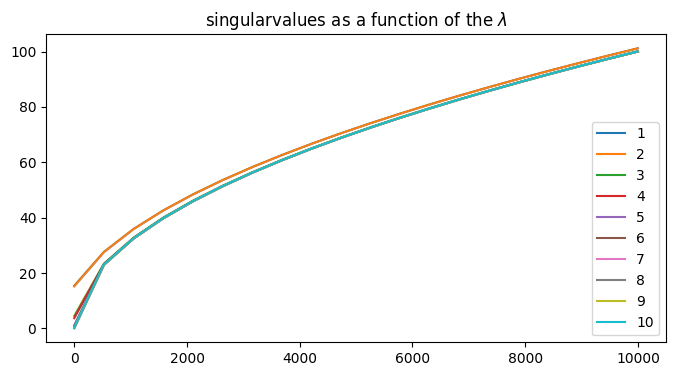

In [8]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
import warnings
warnings.filterwarnings("ignore")

n = 50
n_ord = 10
xrange = (-5.0, 5.)
x = np.linspace(min(xrange), max(xrange),n)
ftrs = np.delete(PolynomialFeatures(n_ord).fit_transform(x[:, np.newaxis]),0, axis=1)

standardized_ftrs = StandardScaler().fit_transform(ftrs)

# lets look at the singular values of X 
S = np.linalg.svd(standardized_ftrs, compute_uv = False)
print(f"singular values of X: \n {S}")

eigvalsh = np.sqrt(np.linalg.eigvalsh(standardized_ftrs.T @ standardized_ftrs))[::-1]
print(f"sqrt of eigenvalues of (X^TX): \n {eigvalsh}")

lambdas = np.linspace(0, 10000, 20)
eigvalshs = []
for lamb in lambdas:
    eigvalsh = np.sqrt(np.linalg.eigvalsh(standardized_ftrs.T @ standardized_ftrs + 
                                  lamb * np.identity(standardized_ftrs.shape[1])))[::-1]
    # print(f"sqrt of eigenvalues of (X^TX) + {lamb} I: \n {eigvalsh[::-1]}")
    eigvalshs.append(eigvalsh)
               
for i, eig in enumerate(np.array(eigvalshs).T):
    plt.plot(lambdas, eig, label=f"{i+1}")
plt.title("singularvalues as a function of the $\lambda$")
plt.legend()

In [12]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

## Loss functions and Regularization

In the previous Lectures we have seen that in order to avoid overfitting, it is advisable to avoid models that have a large model complexity. This is best done by adding a "penalty term"  $\cal{R}$ involving this model complexity to the loss function $\cal{L}$ used for model training: 

$${\cal{L}}_{\lambda}(\theta)=  {\cal{L}}(\theta) + {\lambda}  {\cal{R}}(\theta) $$

where $\theta$ denotes the vector of model coefficients, and $\lambda$ is a 'hyperparameter' of the fitting algorithm whose value balances the model estimation between decreasing training error reduction and keeping the model complexity small.  For small values of $\lambda$ the models will overfit and for larger values of $\lambda$ the models with underfit.

The optimal value $\lambda_{opt}$ can be obtained by using a grid search over the range of potential values of $\lambda$

As mentioned earlier,  the model complexity for linear models can be measured by the norm of the coeeficient vector $\theta$, and the penalty term will penalizer large values of $||\theta||$.   For example, using the the $p$-norm of $\theta$

$$\cal{R}(\theta) = ||\theta||_p = \left(\sum_d|\theta_d|^p\right)^{1/p}$$

However, typically we use the $l_1 = ||\theta||_1 = \sum|\theta_i|$ or $l_2 = ||\theta||_2 = \sqrt{\sum \theta_i^2}$ norms.  

#  Properties of $l_p$-norm Regularization 

- $l_0$ regularization is equivalent to best subset selection, i.e. finding the best subset of non-zero coefficients; however there are no efficient algorithms for this since the search space is combinatorial.
  
-  $l_1$ regularization leads to sparse solutions with many of the coefficients being forced to zero; There are efficicient algorithms e.g. the Lasso; however, if 2 features are essentially identical then only one of them gets selected whereas it might be more useful to have both features have identical coefficients
  
-  $l_2$ regularization is widely used, the coefficients have an exact solution in terms of the normal equations, and optimization based approaches can also be used since this norm is differentiable; however does not lead to sparse solutions but handles the case of collinear features quite well.
  
- $l_p$ regularization for $p > 2$ is rarely used.
  
- $l_1$ + $l_2$ regularization is an interesting variant called the Elastic Net; has 2 hyperparameters instead of 1 to optimize but leads to solutions which consist of sparse groups of coefficients, and each group consisting of collinear features whose coefficients are weighted equally.

Lets work with a real dataset (the one we worked with last time).

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

bunch = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(bunch['data'], bunch['target'])

Lets look at how the coefficients change as we alter $\alpha$

In [10]:
alphas = np.linspace(0.001, .5, 100)
weights = []
for alpha in alphas:
    l_model = Lasso(alpha=alpha).fit(X_train, y_train)
    weights.append(l_model.coef_)
for i, weight in enumerate(np.array(weights).T):
    plt.plot(alphas, weight, label=bunch['feature_names'][i])
plt.legend()

NameError: name 'Lasso' is not defined

In [1]:
from ipywidgets import interact

nsamp = 100
print(f'nsamp: {nsamp}')

x_1 = 2 * np.random.rand(nsamp, 1)  # column vector

@interact
def plot_lines(sigs=(1, 10, 0.5)):
    y = theta_true[0] + theta_true[1] * x_1 + sigs*np.random.randn(nsamp,1 )  # column vector
    fig, axes = plt.subplots(1,4, figsize=(15, 3), sharex=True, sharey=True)
    for ax, theta_trial in zip(axes, theta_trials):
        ax.hist(y - (theta_trial[0]  + theta_trial[1] * x_1), alpha=.5, bins=20)
        ax.annotate(f'loss = {0.5*np.linalg.norm(y - (theta_trial[0]  + theta_trial[1] * x_1)):.2f}', 
                    xy = (2,150), xycoords='axes points')
        ax.set_xlim(-5*sigs, 5*sigs)
        ax.set_title(rf'${{\theta_0}}$ = {theta_trial[0]}, ${{\theta_1}}$ = {theta_trial[1]}')
    plt.show()    




nsamp: 100


NameError: name 'np' is not defined

# Notation: Design Matrix


We can use matrix notation: $y, \epsilon \in \mathbb{R}^n,  X \in \mathbb{R}^{n \times (d+1)},  \theta \in \mathbb{R}^{(d+1)} $ of the form to write

\begin{align*}
y = X\theta + \epsilon,
\end{align*}
where 
\begin{align*}
y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{bmatrix}, \qquad
X = \begin{bmatrix}
x_0^{(1)} & \ldots & x_{d+1}^{(1)} \\
x_0^{(2)} & \ldots & x_{d+1}^{(2)} \\
\vdots  & \vdots & \vdots \\
x_0^{(n)} & \ldots & x_{d+1}^{(n)}\\
\end{bmatrix}, \qquad
\theta = \begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\vdots \\
\theta_{d}
\end{bmatrix}, \qquad
\epsilon = \begin{bmatrix}
\epsilon^{(1)} \\
\epsilon^{(2)} \\
\vdots \\
\epsilon^{(n)}
\end{bmatrix}.
\end{align*}

# Loss function: Mean Squared Error

We estimate the parameters $\theta$ to minimize the mean squared error (MSE) on the training data (with slight differences, this objective are also known as the residual sum of squares (RSS)), defined by

$${\cal{L}}(\theta)= \frac{1}{2n} \sum_{i=1}^n(\epsilon^{(i)})^2 = \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^T x^{(i)})^2$$

This can eqivalently be written in matrix-vector form as:
$${\cal{L}}(\theta) = \frac{1}{2} \|\epsilon\|^2 = \frac{1}{2} \|y-X\theta\|^2,$$
where $X$ is the design matrix and $\|\cdot\|$ denotes the Euclidean norm.

The estimated value $\hat{\theta}$ is then given by 

$$ \hat{\theta} = \arg\min_{\theta} {\cal{L}}(\theta),$$

and the correspond prediction for $y$ is given $\hat{y} = f(x;\hat{\theta})$.

# The Gradient of the Loss function

The parameter estimation will require the gradient of the loss function with respect to the parameters. 

In the case of the squared error loss function the gradients can be computed explicitly (review matrix differential calculus)

\begin{align*}
\nabla_\theta \cal{L}(\theta) 
& = \nabla_\theta \frac{1}{2} (X \theta - y)^T  (X \theta - y) \\
& = (X^T X) \theta - X^T y
\end{align*}



# Normal Equations


Setting the gradient of the loss function to zero, we obtain the *normal equations*:
$$ (X^T X) \theta = X^T y.$$

Hence, the value $\hat{\theta}$ that minimizes this objective is given by:
$$ \hat{\theta} = (X^T X)^{-1} X^T y.$$

Note that we assumed that the matrix $(X^T X)$ is invertible, that is $X$ is of full rank; if this is not the case, there are some ways of addressing this issue.

# Relationship between the Model and the Loss function

In [1]:
import numpy as np
import sklearn
from sklearn.preprocessing import add_dummy_feature
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

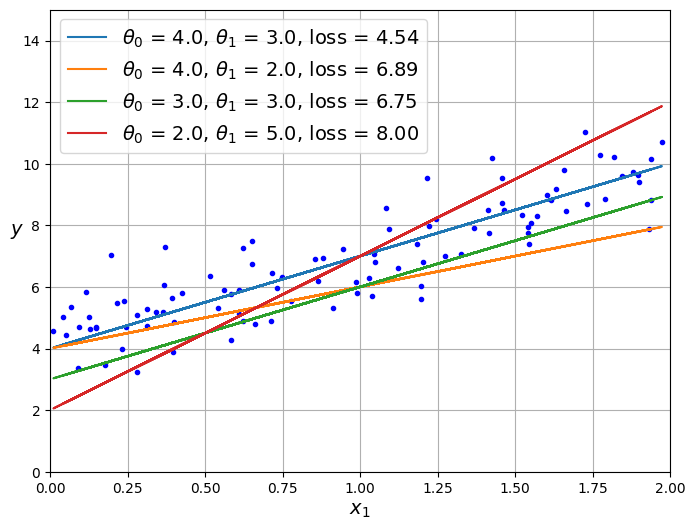

In [2]:


np.random.seed(42)  # to make this code example reproducible
nsamp = 100  # number of instances

# synthetic data with known theta
theta_true = (4.0, 3.0)
sig = 1.0
x_1 = 2 * np.random.rand(nsamp, 1)  # column vector
y = theta_true[0] + theta_true[1] * x_1 + sig*np.random.randn(nsamp,1 )  # column vector

plt.figure(figsize=(8, 6))
plt.plot(x_1, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

theta_trials = [theta_true, (4.0, 2.0), (3.0, 3.0), (2.0, 5.0)]
for theta_trial in theta_trials:
    plt.plot(x_1, theta_trial[0] + theta_trial[1] * x_1 , 
             label=rf'${{\theta_0}}$ = {theta_trial[0]}, ${{\theta_1}}$ = {theta_trial[1]}, loss = {0.5*np.linalg.norm(y - (theta_trial[0]  + theta_trial[1] * x_1)):.2f}')
plt.legend()

plt.show()


# Dependence of the Loss Function on Model Coefficients

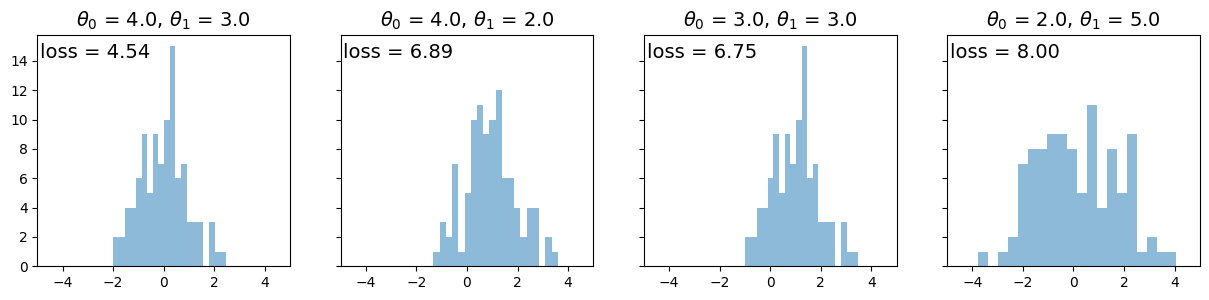

In [6]:
# plot the histogram of residuals for each line

fig, axes = plt.subplots(1,4, figsize=(15, 3), sharex=True, sharey=True)

for ax, theta_trial in zip(axes, theta_trials):
    ax.hist(y - (theta_trial[0]  + theta_trial[1] * x_1), alpha=.5, bins=20)
    ax.annotate(f'loss = {0.5*np.linalg.norm(y - (theta_trial[0]  + theta_trial[1] * x_1)):.2f}', 
                xy = (2,150), xycoords='axes points')
    ax.set_xlim(-5*sig, 5*sig)
    ax.set_title(rf'${{\theta_0}}$ = {theta_trial[0]}, ${{\theta_1}}$ = {theta_trial[1]}')

# Sensitivity of the Loss Function to the noise level in the data

As can be seen from this interactive plot the loss function is quite inssensitive to the parameter values when the noise is large. 

Therefore recovering the signal from noisy observations is intrinsically hard and may require many more observations.

# Summary

Linear models are widely used in various domains for the following reasons:

+ Interpretability: Easy to understand the relationship between features and target variables.
+ Efficiency: Computationally efficient to train and predict.
+ Versatility: Applicable to various tasks with diverse data types.

This module contained an introduction to gradient descent, particularly stochastic gradient descent (SGD) which is widely used for computational efficiency in large datasets.

Some of the applications in which linear models are used include:

+ Finance: Predicting stock prices, creditworthiness assessment
+ Healthcare: Analyzing medical data, predicting disease risk
+ Marketing: Customer segmentation, targeted advertising
+Natural Language Processing: Sentiment analysis, topic modeling


Although linear models are well-understood and should be the first choice for any modeling procedure, you should be aware of some of the challenges, which include:

+ Multicollinearity 
+ Feature and Model Selection
+ Feature acquisition cost